In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('spam.csv',encoding='latin-1')

In [2]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True )

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = data['v2']

In [7]:
# lowercase the text
X = X.apply(lambda x: x.lower())
X

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5572, dtype: object

In [8]:
# apply lemmetization
import spacy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [9]:
X = X.apply(lambda x : ' '.join([i.lemma_ for i in nlp(x)]))
X

0       go until jurong point , crazy .. available onl...
1                           ok lar ... joke wif u oni ...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor ... u c already then sa...
4       nah I do not think he go to usf , he live arou...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                 will ì _ b go to esplanade fr home ?
5569    pity , * be in mood for that . so ... any othe...
5570    the guy do some bitching but I act like I woul...
5571                          rofl . its true to its name
Name: v2, Length: 5572, dtype: object

In [10]:
X = X.apply(lambda x : x.lower())
X

0       go until jurong point , crazy .. available onl...
1                           ok lar ... joke wif u oni ...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor ... u c already then sa...
4       nah i do not think he go to usf , he live arou...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                 will ì _ b go to esplanade fr home ?
5569    pity , * be in mood for that . so ... any othe...
5570    the guy do some bitching but i act like i woul...
5571                          rofl . its true to its name
Name: v2, Length: 5572, dtype: object

In [11]:
stopwords = nlp.Defaults.stop_words
import string
letters = string.ascii_letters

In [12]:
X = X.apply(lambda x: ' '.join([i.text for i in nlp(x)  if i.text not in stopwords and i.text not in letters ]))
X

0       jurong point , crazy .. available bugis great ...
1                             ok lar ... joke wif oni ...
2       free entry 2 wkly comp win fa cup final tkts 2...
3                                   dun early hor ... ...
4                                    nah think usf , live
                              ...                        
5567    2nd time try 2 contact u. win å£750 pound priz...
5568                              ì _ esplanade fr home ?
5569                     pity , * mood . ... suggestion ?
5570       guy bitching act like interested buy week free
5571                                          rofl . true
Name: v2, Length: 5572, dtype: object

In [13]:
K = X.apply(lambda x: ''.join([i for i in x if i not in string.punctuation and i not in string.digits]))
K

0       jurong point  crazy  available bugis great wor...
1                                   ok lar  joke wif oni 
2       free entry  wkly comp win fa cup final tkts st...
3                                         dun early hor  
4                                     nah think usf  live
                              ...                        
5567    nd time try  contact u win å£ pound prize   cl...
5568                                ì  esplanade fr home 
5569                            pity   mood   suggestion 
5570       guy bitching act like interested buy week free
5571                                           rofl  true
Name: v2, Length: 5572, dtype: object

In [14]:
K = K.apply(lambda x: ' '.join(x.split( )))
K

0       jurong point crazy available bugis great world...
1                                     ok lar joke wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                                           dun early hor
4                                      nah think usf live
                              ...                        
5567    nd time try contact u win å£ pound prize claim...
5568                                  ì esplanade fr home
5569                                 pity mood suggestion
5570       guy bitching act like interested buy week free
5571                                            rofl true
Name: v2, Length: 5572, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vec = TfidfVectorizer(max_features=1000)
vec

TfidfVectorizer(max_features=1000)

In [17]:
tfidf = vec.fit_transform(K)
tfidf

<5572x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 27235 stored elements in Compressed Sparse Row format>

In [18]:
X = pd.DataFrame(data = tfidf.toarray() ,columns= vec.get_feature_names_out())
X

,abiola,able,abt,accept,access,account,actually,ad,add,address,...,yes,yesterday,yo,yoga,you,yr,yrs,yup,ìï,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y = data['v1']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
gm = MultinomialNB()

In [24]:
gm.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = gm.predict(X_test)
y_pred

array(['spam', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9704035874439462

In [27]:
from sklearn.metrics import classification_report
reports = classification_report(y_test, y_pred)
print(reports)

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.95      0.82      0.88       149

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [28]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[960,   6],
       [ 27, 122]], dtype=int64)

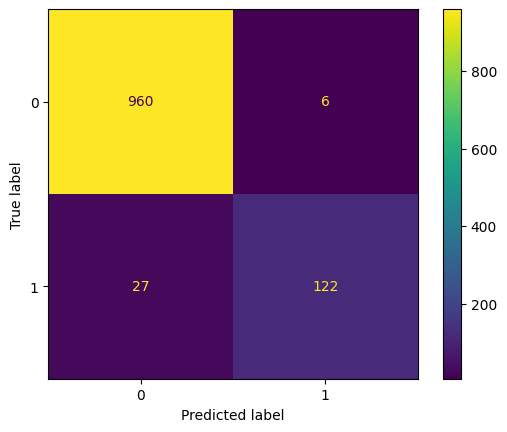

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()